In [ ]:
%load_ext autoreload

In [ ]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import matplotlib.pyplot as plt
from utils.utils import show_images
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from typing import Callable
import os
import PIL.Image as Image
import numpy as np
import pandas as pd
import torch
from torch import Tensor
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from typing import Optional


In [ ]:
manual_seed = 999
print(f"Random Seed: {manual_seed}")
random.seed(manual_seed)
torch.manual_seed(manual_seed)
torch.use_deterministic_algorithms(True)

In [ ]:

latent_vector_size = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
%autoreload 2

from src.mod.plugins.early_stopping import EarlyStopping
from src.mod.datasets import CelebA
from src.mod.models import Classifier, Generator, Discriminator
from src.mod.datasets.utils import split_dataset


In [ ]:
from typing import Mapping
from typing import Any
transform = transforms.Compose([
  transforms.Resize(64),
  transforms.CenterCrop(64),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

dataset = CelebA(
  dataset_path='../resources/datasets/celeba',
  image_directory='img_align_celeba',
  annotations_directory='annotations',
  image_transform=transform
)

generator = Generator(latent_vector_size, 64, 3, with_weights=torch.load('generator.pt'))
discriminator = Discriminator(3, 64, with_weights=torch.load('discriminator.pt'))
classifier = Classifier(64, 3)


In [ ]:
generator

In [ ]:
discriminator

In [ ]:
classifier

In [ ]:
def show_examples():
  dataloader = DataLoader(dataset, batch_size=64, num_workers=2)
  (images, _, _) = next(iter(dataloader))

  plt.figure(figsize=(8, 8))
  plt.axis("off")
  plt.title("Training Images")
  show_images(images)

def show_annotated_example():
  dataloader = DataLoader(dataset, batch_size=1, num_workers=2)
  (images, annotations, _) = next(iter(dataloader))
  annotations = annotations[0][0]

  plt.figure(figsize=(8, 8))
  plt.axis("off")
  plt.title("Example Image")
  show_images(images)
  for (i, column) in enumerate(dataset.annotations.columns):
    print(f"{i + 1:>2}: {annotations[i] > 0.9 and 'Yes' or 'No':>3} - {column}")

show_examples()
show_annotated_example()

Training Process:
1. GAN Training:
- Train D to differentiate real images from those generated by G.
- Train G to fool D into classifying its outputs as real images.
2. Classifier Training:
- Train C using real images and their trait annotations.
3. Combined Training:
- Train G to not only fool D but also to generate images that C classifies with specified traits.

Batches:   0%|          | 0/79 [00:00<?, ?it/s]

[1/20][1/79] DLoss: 3.2338 Gloss: 4.7482


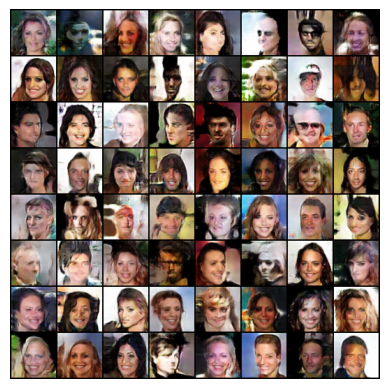


Batches:  68%|██████▊   | 54/79 [00:05<00:01, 13.34it/s]

[1/20][51/79] DLoss: 0.8275 Gloss: 1.5456



Batches:   5%|▌         | 4/79 [00:00<00:12,  6.00it/s]

[2/20][1/79] DLoss: 0.9002 Gloss: 3.3347



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.17it/s]

[2/20][51/79] DLoss: 0.6194 Gloss: 1.7219



Batches:   5%|▌         | 4/79 [00:00<00:12,  6.13it/s]

[3/20][1/79] DLoss: 0.9892 Gloss: 0.5533



Batches:  68%|██████▊   | 54/79 [00:05<00:01, 12.61it/s]

[3/20][51/79] DLoss: 0.7903 Gloss: 4.7410



Batches:   5%|▌         | 4/79 [00:00<00:12,  6.22it/s]

[4/20][1/79] DLoss: 0.4473 Gloss: 2.4498



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.03it/s]

[4/20][51/79] DLoss: 0.4811 Gloss: 2.8929



Batches:   5%|▌         | 4/79 [00:00<00:12,  6.24it/s]

[5/20][1/79] DLoss: 0.4423 Gloss: 2.1865



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.12it/s]

[5/20][51/79] DLoss: 0.3768 Gloss: 3.0926



Batches:   4%|▍         | 3/79 [00:00<00:16,  4.61it/s]

[6/20][1/79] DLoss: 0.3501 Gloss: 2.6530



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.47it/s]

[6/20][51/79] DLoss: 0.5763 Gloss: 2.4089



Batches:   5%|▌         | 4/79 [00:00<00:11,  6.58it/s]

[7/20][1/79] DLoss: 0.8487 Gloss: 1.0242



Batches:  33%|███▎      | 26/79 [00:02<00:05, 10.26it/s]

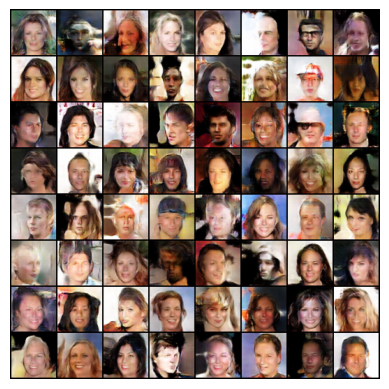


Batches:  68%|██████▊   | 54/79 [00:04<00:01, 12.78it/s]

[7/20][51/79] DLoss: 0.4063 Gloss: 3.4148



Batches:   5%|▌         | 4/79 [00:01<00:20,  3.70it/s]

[8/20][1/79] DLoss: 1.0161 Gloss: 0.8319



Batches:  68%|██████▊   | 54/79 [00:05<00:02, 12.50it/s]

[8/20][51/79] DLoss: 0.3589 Gloss: 3.8900



Batches:   5%|▌         | 4/79 [00:00<00:11,  6.74it/s]

[9/20][1/79] DLoss: 0.5011 Gloss: 2.6393



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.89it/s]

[9/20][51/79] DLoss: 0.4267 Gloss: 3.0320



Batches:   5%|▌         | 4/79 [00:00<00:10,  7.02it/s]

[10/20][1/79] DLoss: 0.3084 Gloss: 2.7213



Batches:  66%|██████▌   | 52/79 [00:04<00:02, 12.18it/s]

[10/20][51/79] DLoss: 0.6475 Gloss: 5.5819



Batches:   5%|▌         | 4/79 [00:00<00:11,  6.53it/s]

[11/20][1/79] DLoss: 0.2502 Gloss: 3.4436



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 14.35it/s]

[11/20][51/79] DLoss: 0.4347 Gloss: 5.8884



Batches:   5%|▌         | 4/79 [00:00<00:12,  6.13it/s]

[12/20][1/79] DLoss: 1.1913 Gloss: 1.8228



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.83it/s]

[12/20][51/79] DLoss: 0.3008 Gloss: 3.0307



Batches:   5%|▌         | 4/79 [00:00<00:10,  6.93it/s]

[13/20][1/79] DLoss: 0.2714 Gloss: 3.1797



Batches:  66%|██████▌   | 52/79 [00:04<00:02, 12.36it/s]

[13/20][51/79] DLoss: 0.2867 Gloss: 4.0190


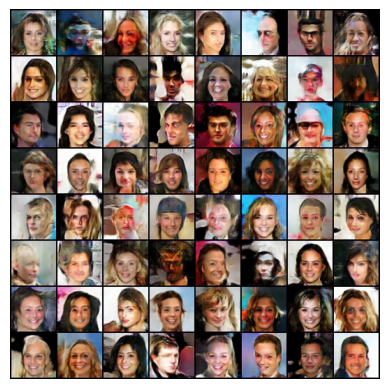


Batches:   5%|▌         | 4/79 [00:00<00:10,  7.11it/s]

[14/20][1/79] DLoss: 0.4520 Gloss: 2.2069



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 14.49it/s]

[14/20][51/79] DLoss: 0.2669 Gloss: 3.0187



Batches:   5%|▌         | 4/79 [00:00<00:11,  6.80it/s]

[15/20][1/79] DLoss: 0.2383 Gloss: 3.7262



Batches:  67%|██████▋   | 53/79 [00:04<00:01, 13.55it/s]

[15/20][51/79] DLoss: 0.3003 Gloss: 3.5604



Batches:   5%|▌         | 4/79 [00:00<00:10,  7.24it/s]

[16/20][1/79] DLoss: 0.4820 Gloss: 2.0847



Batches:  70%|██████▉   | 55/79 [00:04<00:01, 14.18it/s]

[16/20][51/79] DLoss: 0.3811 Gloss: 3.7673



Batches:   5%|▌         | 4/79 [00:01<00:14,  5.02it/s]

[17/20][1/79] DLoss: 0.2054 Gloss: 3.8174



Batches:  70%|██████▉   | 55/79 [00:05<00:01, 14.87it/s]

[17/20][51/79] DLoss: 0.1484 Gloss: 3.9559



Batches:   5%|▌         | 4/79 [00:00<00:11,  6.35it/s]

[18/20][1/79] DLoss: 0.1815 Gloss: 3.8644



Batches:  71%|███████   | 56/79 [00:04<00:01, 16.44it/s]

[18/20][51/79] DLoss: 1.8248 Gloss: 0.1605



Batches:   5%|▌         | 4/79 [00:00<00:10,  6.84it/s]

[19/20][1/79] DLoss: 1.9975 Gloss: 1.1055



Batches:  68%|██████▊   | 54/79 [00:04<00:01, 13.64it/s]

[19/20][51/79] DLoss: 0.2032 Gloss: 3.6989



Batches:  96%|█████████▌| 76/79 [00:06<00:00, 15.27it/s]

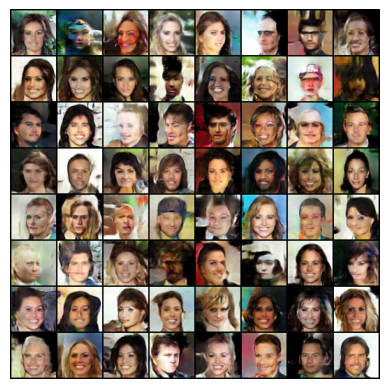


Batches:   5%|▌         | 4/79 [00:00<00:11,  6.30it/s]

[20/20][1/79] DLoss: 0.2811 Gloss: 2.8394



Batches:  70%|██████▉   | 55/79 [00:04<00:01, 14.76it/s]

[20/20][51/79] DLoss: 0.3351 Gloss: 4.4617



Epochs: 100%|██████████| 20/20 [02:19<00:00,  6.99s/it]


(Generator(
   (main): Sequential(
     (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
     (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (5): ReLU(inplace=True)
     (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (8): ReLU(inplace=True)
     (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): ReLU(inplace=True)
     (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (13

In [21]:
from src.mod.datasets.utils import create_latent_vectors
from tqdm import tqdm
from torch.optim import AdamW

def train_gan(
    generator: nn.Module,
    discriminator: nn.Module,
    dataloader: DataLoader,
    *,
    epoch_count: int,
    save_to: Optional[str] = None,
    device: torch.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
):
  generator.train()
  discriminator.train()
  generator.to(device)
  discriminator.to(device)

  RealLabel = 1.0
  FakeLabel = 0.0

  lr = 0.0002
  beta1 = 0.5
  
  discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))
  generator_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
  # generator_optimizer = optim.AdamW(generator.parameters())
  # discriminator_optimizer = optim.AdamW(discriminator.parameters())
  # generator_scheduler = ReduceLROnPlateau(generator_optimizer, 'min', patience=20, factor=0.5)
  # discriminator_scheduler = ReduceLROnPlateau(discriminator_optimizer, 'min', patience=20, factor=0.5)

  generator_criterion = nn.BCELoss()
  discriminator_criterion = nn.BCELoss()
  fixed_noise = create_latent_vectors(64, latent_vector_size, device)

  generator_losses = []
  discriminator_losses = []
  iterations = 0

  for epoch in tqdm(range(1, epoch_count + 1), desc="Epochs", total=epoch_count):
    for batch_nr, (images, _, _) in tqdm(enumerate(dataloader, 0), desc="Batches", total=len(dataloader)):
      discriminator.zero_grad()
      real_images = images.to(device)
      batch_size = real_images.size(0)

      real_labeling = torch.full((batch_size,), RealLabel, dtype=torch.float, device=device)
      expected_labeling = discriminator(real_images).view(-1)
      real_images_discriminator_loss = discriminator_criterion(expected_labeling, real_labeling)
      real_images_discriminator_loss.backward()

      latent_vectors = create_latent_vectors(batch_size, latent_vector_size, device)
      fake_images = generator(latent_vectors)
      real_labeling.fill_(FakeLabel)
      expected_labeling = discriminator(fake_images.detach()).view(-1)

      fake_images_discriminator_loss = discriminator_criterion(expected_labeling, real_labeling)
      fake_images_discriminator_loss.backward()

      discriminator_loss = real_images_discriminator_loss + fake_images_discriminator_loss
      discriminator_optimizer.step()
      # discriminator_scheduler.step(discriminator_loss)

      generator.zero_grad()
      real_labeling.fill_(RealLabel)
      expected_labeling = discriminator(fake_images).view(-1)
      generator_loss = generator_criterion(expected_labeling, real_labeling)
      generator_loss.backward()
      generator_optimizer.step()
      # generator_scheduler.step(generator_loss)

      if batch_nr % 50 == 0:
        dloss = discriminator_loss.item()
        gloss = generator_loss.item()
        print(f'[{epoch}/{epoch_count}][{batch_nr + 1}/{len(dataloader)}]', f"DLoss: {dloss:.4f}", f"Gloss: {gloss:.4f}")

      generator_losses.append(generator_loss.item())
      discriminator_losses.append(discriminator_loss.item())

      if (iterations % 500 == 0) or ((epoch == epoch_count - 1) and (batch_nr == len(dataloader) - 1)):
        with torch.no_grad():
          fake_images = generator(fixed_noise).detach().cpu()
        show_images(fake_images)

      iterations += 1
  generator.eval()
  discriminator.eval()

  if save_to:
    torch.save(generator.state_dict(), f"g.{save_to}")
    torch.save(discriminator.state_dict(), f"d.{save_to}")

  return generator, discriminator

dataset = CelebA(
  dataset_path='../resources/datasets/celeba',
  image_directory='img_align_celeba',
  annotations_directory='annotations',
  max_image_count=5000,
  image_transform=transform
)
dataloader = DataLoader(dataset, batch_size=64, num_workers=8)

generator = Generator(latent_vector_size, 64, 3, with_weights=torch.load('d.checkpoint.pt'))
discriminator = Discriminator(3, 64, with_weights=torch.load('d.checkpoint.pt'))

# train_gan(
#   generator,
#   discriminator,
#   dataloader,
#   epoch_count=20,
#   save_to="checkpoint.pt"
# )

In [ ]:

def train_latent_vector_generator(
    generator: nn.Module,
    train_dataloader: DataLoader,
    val_dataloader: DataLoader,
    epoch_count: int,
    save_to: str,
    on_train: Optional[Callable[[int, float, Tensor, Tensor, Tensor, list[str]], None]] = None,
    on_validate: Optional[Callable[[int, float, Tensor, Tensor, Tensor, list[str]], None]] = None,
    on_epoch: Optional[Callable[[int, float, float], None]] = None
):
  generator.train()

  optimizer = AdamW(generator.parameters())
  scheduler = ReduceLROnPlateau(optimizer, 'min', patience=20, factor=0.5)
  early_stopping = EarlyStopping(
    generator,
    patience=5,
    verbose=True,
    save_to=save_to
  )
  criterion = nn.MSELoss()

  for epoch in range(1, epoch_count + 1):
    generator.train()
    train_loss = 0.0
    for batch_nr, (images, _, paths) in tqdm(
        enumerate(train_dataloader, 1),
        desc="Training",
        total=len(train_dataloader)
    ):
      images = images.to(device)
      optimizer.zero_grad()

      latent_vectors = create_latent_vectors(images.size(0), latent_vector_size, device)
      generated = generator(latent_vectors)
      loss = criterion(generated, images)

      loss.backward()
      optimizer.step()
      scheduler.step(loss)

      train_loss += loss.item()
      if on_train: on_train(batch_nr, loss, latent_vectors, generated, images, paths)
    train_loss /= len(train_dataloader)

    generator.eval()
    val_loss = 0.0
    for batch_nr, (images, _, paths) in tqdm(
        enumerate(val_dataloader, 1),
        desc="Validation",
        total=len(val_dataloader)
    ):
      images = images.to(device)
      latent_vectors = create_latent_vectors(images.size(0), latent_vector_size, device)
      generated = generator(latent_vectors)
      loss = criterion(generated, images)
      val_loss += loss.item()
      if on_validate: on_validate(batch_nr, loss, latent_vectors, generated, images, paths)
    val_loss /= len(val_dataloader)

    if early_stopping.step(val_loss): break
    if on_epoch: on_epoch(epoch, train_loss, val_loss)
  generator.eval()
  return generator

dataframe: pd.DataFrame = pd.DataFrame()
generator = Generator(latent_vector_size, 64, 3, with_weights=torch.load('generator.pt'))
generator.to(device)
train_dataloader, validation_dataloader = split_dataset(dataset, 0.8)


# every epoch show generated images grid
def on_epoch(epoch, train_loss, val_loss):
  print(f"Epoch {epoch}: Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")
  vec = create_latent_vectors(64, latent_vector_size, device)
  generated = generator(vec)
  show_images(generated)

train_latent_vector_generator(
  generator,
  train_dataloader,
  validation_dataloader,
  epoch_count=20,
  save_to="generator_checkpoint.pt",
  on_epoch=on_epoch
)


In [ ]:
# Create latent vectors for all images in the dataset by running the generator

In [ ]:
vec = create_latent_vectors(1, latent_vector_size, device)
generated = generator(vec)

show_images(generated)


In [ ]:
dataframe

In [ ]:
vector = (
  torch.tensor(pd.to_numeric(dataframe.loc[0][0:100]).to_numpy(), device=device)
  .unsqueeze(1).unsqueeze(1).unsqueeze(0).float()
)
path = dataframe.loc[0]['img']

real_image = Image.open(f"../resources/datasets/celeba/img_align_celeba/{path}").convert("RGB")
real_image = transform(real_image).unsqueeze(0).to(device)

show_images(generator(vector), real_image)

In [ ]:
latent_vector = torch.randn(64, latent_vector_size, 1, 1, device=device, requires_grad=True)
generated = generator(latent_vector)

show_images(generated)

In [ ]:
dataframe.to_csv('latent_vectors.csv')

In [ ]:
dataframe = pd.read_csv('latent_vectors.csv')

In [ ]:
# Read annotations from celeba dataset
annotations = pd.read_csv('../resources/datasets/celeba/list_attr_celeba.txt', skiprows=1, delim_whitespace=True, index_col=None)
annotations.head()

In [ ]:
# Test classifier on latent space from the dataset and show real image and predicted attributes
(vector, attributes) = classifier_dataset[0]
vector = torch.tensor(vector).to(device)
image = Image.open(f"../resources/datasets/celeba/img_align_celeba/000001.jpg").convert("RGB")
classified = classifier(vector).cpu().detach().numpy()
error = np.abs(classified - attributes)

for i, err in enumerate(error[0]):
  print(f"{i:>2}: {err:.2f} - {annotations.columns[i]}")
  plt.imshow(image)


In [ ]:
latent_vector = torch.randn(1, latent_vector_size, 1, 1, device=device, requires_grad=True)

generated = generator(latent_vector)
classified = classifier(latent_vector.resize(1, latent_vector_size)).cpu().detach().numpy()

for i, err in enumerate(classified[0]):
  print(f"{i:>2}: {err:.2f} - {annotations.columns[i]}")
show_images(generated)


In [ ]:
def find_attribute_direction(latent_vectors, classifier, target_scores):
  latent_vectors = latent_vectors.requires_grad_()
  attribute_scores = classifier(latent_vectors)
  loss = torch.nn.functional.mse_loss(attribute_scores, target_scores)
  loss.backward()
  print(latent_vectors.grad)
  attribute_direction = latent_vectors.grad
  return attribute_direction.mean(dim=0)

def steer_away_from_attribute(latent_vector, direction, intensity=1.0):
  return latent_vector - intensity * direction

latent_vectors = torch.randn(32, latent_vector_size).to(device)
target_scores = torch.ones(32, 40).to(device)

latent_vectors = latent_vectors.resize(32, latent_vector_size)
direction = find_attribute_direction(latent_vectors, classifier, target_scores)
adjusted_latent_vector = steer_away_from_attribute(latent_vectors, direction, intensity=1)

real_images = generator(latent_vectors.resize(32, latent_vector_size, 1, 1))
move_images = generator(adjusted_latent_vector.resize(32, latent_vector_size, 1, 1))

show_images(real_images, move_images)
